# EDA - 1. Metadata EDA

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [16]:
meta_df = pd.read_csv('./HAM10000_metadata.csv')
print(f"length of dataframe: {meta_df.shape[0]}; columns in dataframe {meta_df.shape[1]}")
print("------")
print("List of columns")
[print(x) for x in meta_df.columns]
print("------")
meta_df.info()

length of dataframe: 10015; columns in dataframe 7
------
List of columns
lesion_id
image_id
dx
dx_type
age
sex
localization
------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [44]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

meta_df['dx'] = meta_df.dx.map(lesion_type_dict)

### **1. Number of images within each class**

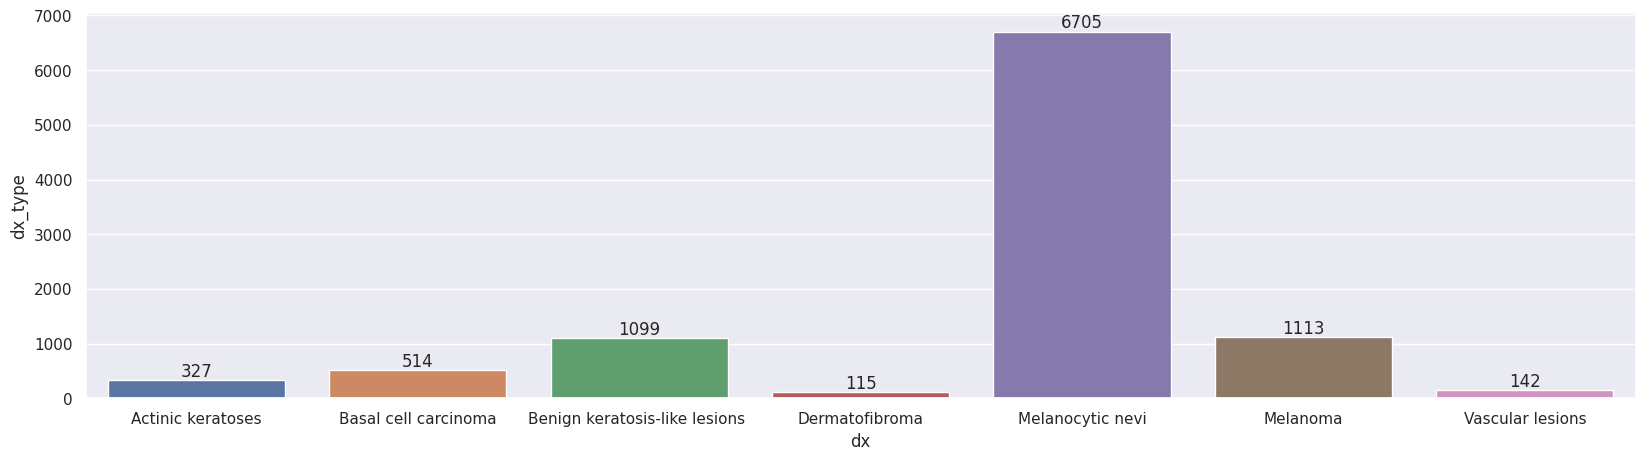

In [42]:
dx_df = df.groupby('dx').count().reset_index()

ax = sns.set_theme(rc={'figure.figsize':(20,5)})
ax = sns.barplot(dx_df, x="dx", y="dx_type")
ax.bar_label(ax.containers[0])
plt.show()

### **1.2 Profile of ages**

average age 52; max age 85; min age 0


<AxesSubplot: xlabel='age', ylabel='sex'>

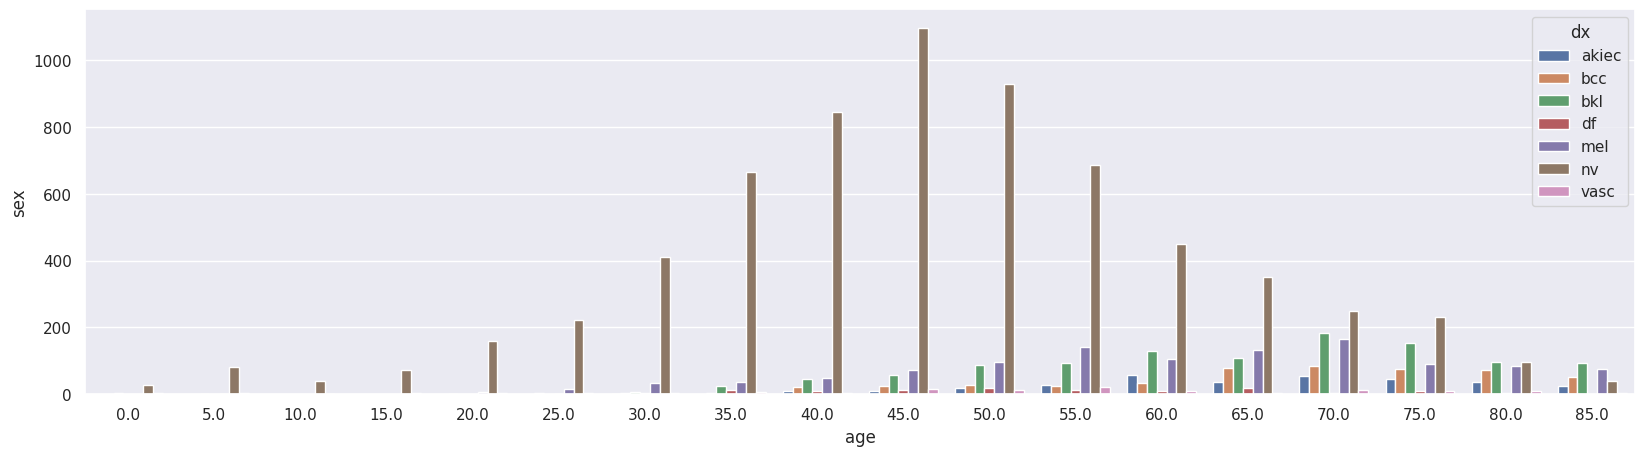

In [102]:
age_df = df.groupby(["dx",'age']).count().reset_index()
age_df
print(f"average age {df.age.mean():.0f}; max age {df.age.max():.0f}; min age {df.age.min():.0f}")
sns.barplot(data=age_df, x='age', y="sex", hue="dx")

# Missing data

In [81]:
df.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [82]:
df.dx_type.unique()

array(['histo', 'consensus', 'confocal', 'follow_up'], dtype=object)

In [83]:
def map_unknown(x):
    if x =="unknown":
        return np.nan
    else:
        return x

df['sex'] = df.sex.apply(lambda x: map_unknown(x))
df['localization'] = df.localization.apply(lambda x: map_unknown(x))

In [84]:
df.isna().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex              57
localization    234
dtype: int64

In [78]:
df.loc[(df.age.isna()) | (df.sex.isna())]

,lesion_id,image_id,dx,dx_type,age,sex,localization
968,HAM_0001186,ISIC_0033391,Benign keratosis-like lesions,consensus,NaN,NaN,NaN
969,HAM_0002660,ISIC_0033750,Benign keratosis-like lesions,consensus,NaN,NaN,NaN
970,HAM_0000372,ISIC_0033685,Benign keratosis-like lesions,consensus,NaN,NaN,NaN
971,HAM_0000948,ISIC_0033631,Benign keratosis-like lesions,consensus,NaN,NaN,NaN
972,HAM_0000983,ISIC_0033490,Benign keratosis-like lesions,consensus,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9625,HAM_0001209,ISIC_0033064,Melanocytic nevi,consensus,NaN,NaN,NaN
9626,HAM_0002402,ISIC_0033515,Melanocytic nevi,consensus,NaN,NaN,NaN
9627,HAM_0001433,ISIC_0033735,Melanocytic nevi,consensus,NaN,NaN,NaN
9628,HAM_0006643,ISIC_0033982,Melanocytic nevi,consensus,NaN,NaN,NaN


In [85]:
df.loc[df.sex.isna()]

,lesion_id,image_id,dx,dx_type,age,sex,localization
968,HAM_0001186,ISIC_0033391,bkl,consensus,NaN,NaN,NaN
969,HAM_0002660,ISIC_0033750,bkl,consensus,NaN,NaN,NaN
970,HAM_0000372,ISIC_0033685,bkl,consensus,NaN,NaN,NaN
971,HAM_0000948,ISIC_0033631,bkl,consensus,NaN,NaN,NaN
972,HAM_0000983,ISIC_0033490,bkl,consensus,NaN,NaN,NaN
973,HAM_0007281,ISIC_0034283,bkl,consensus,NaN,NaN,NaN
974,HAM_0001561,ISIC_0032740,bkl,consensus,NaN,NaN,NaN
975,HAM_0000825,ISIC_0034186,bkl,consensus,NaN,NaN,NaN
977,HAM_0006074,ISIC_0034252,bkl,consensus,NaN,NaN,NaN
978,HAM_0006074,ISIC_0033829,bkl,consensus,NaN,NaN,NaN


### Datastructure of file

In [13]:
from PIL import Image
import cv2
import random

In [14]:
def make_dataframe(path):
    filepath, img_mode=[], []
    img_height, img_width=[], []
    img_format= []
    errorpath=[]
    for root, _, files in os.walk(path):
        for f in files:
            file_path = os.path.join(root, f)
            try:
                img = Image.open(file_path)
                filepath.append(file_path)
                img_mode.append(img.mode)
                img_height.append(img.height)
                img_width.append(img.width)
                img_format.append(img.format)

            except:
                errorpath.append(file_path)

        df = pd.DataFrame.from_dict({
            "filepath":filepath, 
            "mode":img_mode, 
            "height": img_height,
            "width": img_width,
            "format": img_format})

        df["directory"] = df["filepath"].apply(lambda x: x.split('/')[-2])
        df["filename"] = df["filepath"].apply(lambda x: x.split('/')[-1].split('.')[0])

    return df

# check and inspect dataframe
path = "../data/"
photo_df = make_dataframe(path)
photo_df.shape

(20030, 7)

In [17]:
# merge photo_df with meta_df
df = photo_df.merge(meta_df, how="outer", left_on='filename', right_on='image_id', suffixes=('_x', '_y'))
df.head()

,filepath,mode,height,width,format,directory,filename,lesion_id,image_id,dx,dx_type,age,sex,localization
0,../data/ham10000_images_part_2/ISIC_0031774.jpg,RGB,450,600,JPEG,ham10000_images_part_2,ISIC_0031774,HAM_0002275,ISIC_0031774,nv,follow_up,45.0,female,lower extremity
1,../data/HAM10000_images_part_2/ISIC_0031774.jpg,RGB,450,600,JPEG,HAM10000_images_part_2,ISIC_0031774,HAM_0002275,ISIC_0031774,nv,follow_up,45.0,female,lower extremity
2,../data/ham10000_images_part_2/ISIC_0030527.jpg,RGB,450,600,JPEG,ham10000_images_part_2,ISIC_0030527,HAM_0006713,ISIC_0030527,nv,follow_up,50.0,female,trunk
3,../data/HAM10000_images_part_2/ISIC_0030527.jpg,RGB,450,600,JPEG,HAM10000_images_part_2,ISIC_0030527,HAM_0006713,ISIC_0030527,nv,follow_up,50.0,female,trunk
4,../data/ham10000_images_part_2/ISIC_0033561.jpg,RGB,450,600,JPEG,ham10000_images_part_2,ISIC_0033561,HAM_0004708,ISIC_0033561,nv,histo,45.0,male,trunk


In [18]:
df["format"].unique()

array(['JPEG'], dtype=object)

# EDA - 2. Visual EDA

In [5]:
from PIL import Image
import cv2
import random

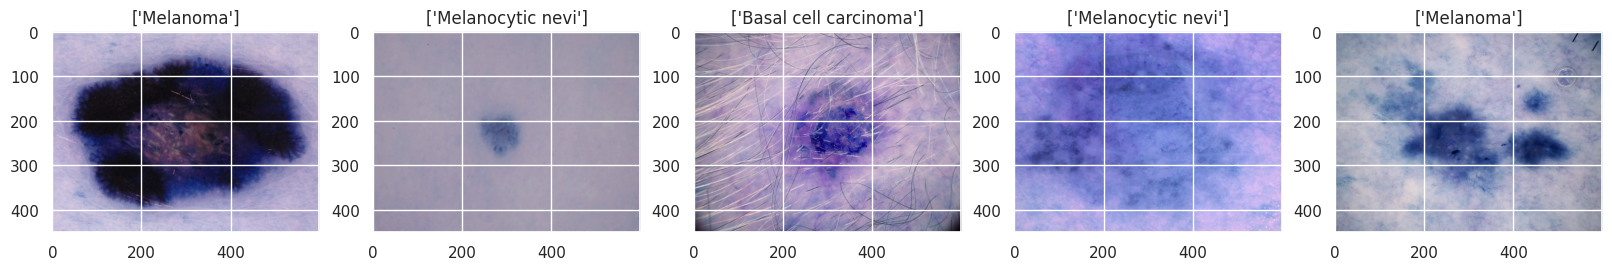

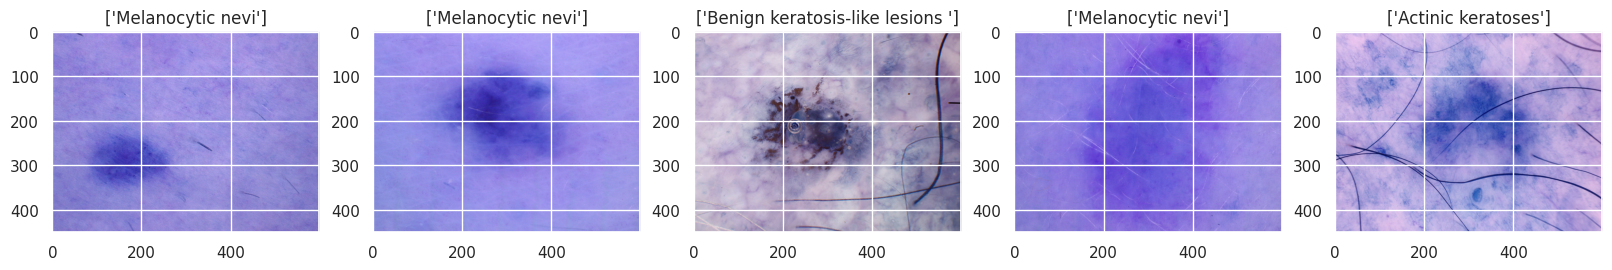

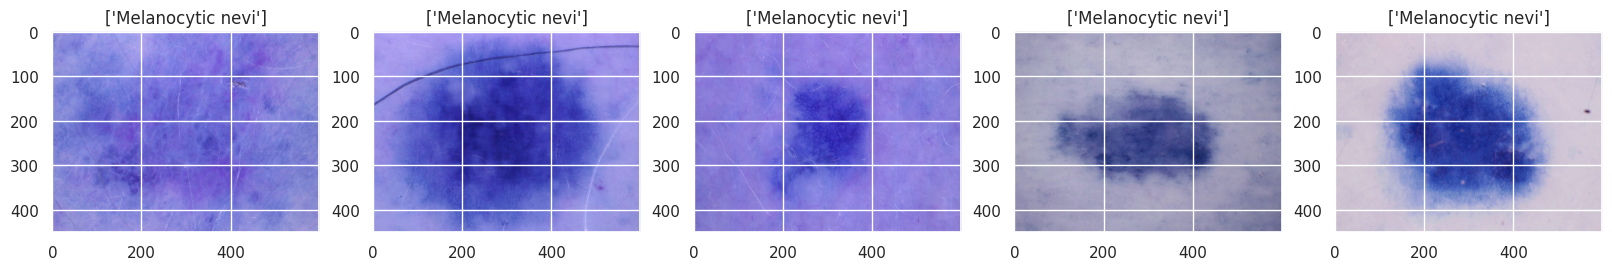

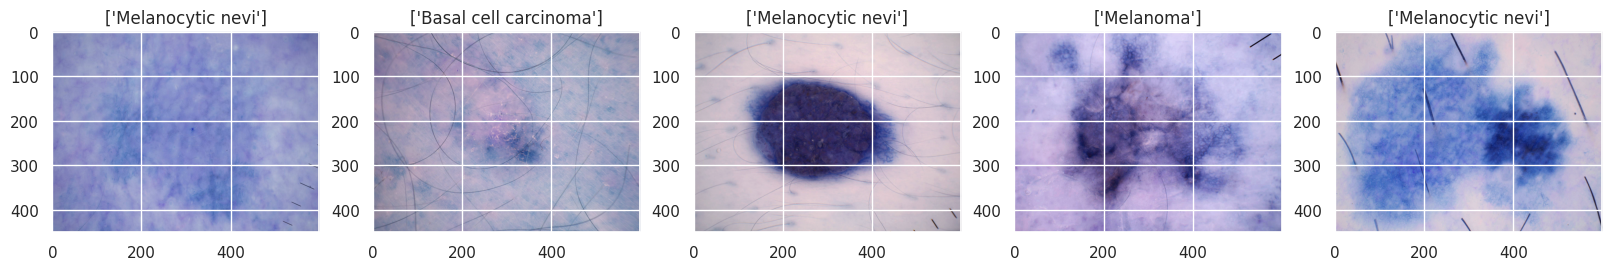

In [106]:
# Eyeballing overall images over 4 files
plt.figure(figsize=(20,20))

def show_n_images(img_folder, num=5):
    for i in range(int(num)):
        file = random.choice(os.listdir(img_folder))
        image_path= os.path.join(img_folder, file)
        img=cv2.imread(image_path)
        ax=plt.subplot(1,5,i+1)
        name = df.loc[df['filepath']==image_path,'dx'].tolist()
        ax.title.set_text(name)
        plt.imshow(img)
    plt.show()

folder = '../data'

for root, dirs, files in os.walk(folder): 
    for d in dirs:
        dir_path = os.path.join(root, d)
        show_n_images(dir_path, 5)
